# Inheritance

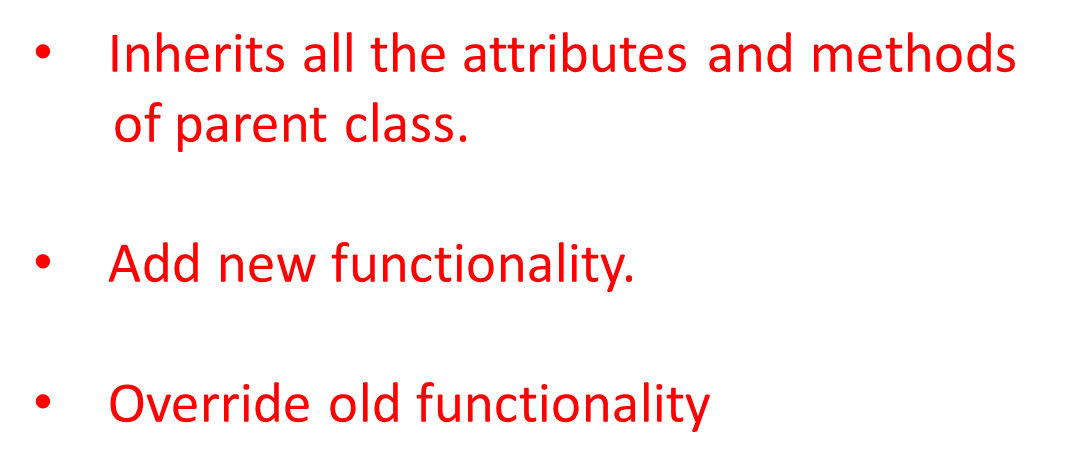

In [50]:
'''Inherits attributes of parent class'''

class A(object):
    def __init__(self, name):
        self.name = name
    def greet(self):
        print("Hi, I am " + self.name)
class B(A):   # class B objects will inherit attributes of class A
    pass
#x = A("rohan") # creating an object through constructor call
y = B("shreyansh") # creating a chicld class object
print(y.name)
print(y, type(y))
#print(y, type(y))
y.greet()  # child class can acces attributes and methods of parent class

shreyansh
<__main__.B object at 0x000001DAC9CBF430> <class '__main__.B'>
Hi, I am shreyansh


In [52]:
'''Override attributes of parent class'''
class A:
    def __init__(self, name):
        self.name = name
    def greet(self):
        print("Hi, I am " + self.name)
class B(A):
    def greet(self):
        print("Hi, I am " + self.name)
        print("I am a child class of A")
#x = A("rohan")
y = B("shreyansh")
#print(x, type(x))
print(y.name)
print(y, type(y))
y.greet()  # child class can override the methods of the parent class

shreyansh
<__main__.B object at 0x000001DAC9D05340> <class '__main__.B'>
Hi, I am shreyansh
I am a child class of A


In [55]:
'''Can exploit the attributes of parent class with same namespace'''

class A:
    def __init__(self, name):
        self.name = name
    def greet(self):
        print("Hi, I am " + self.name)
class B(A):
    def greet(self):
        #print("Hi, I am " + self.name)
        A.greet(self) # child can still access the methods of parent class if required
        print("I am a child class of A")
#x = A("rohan")
y = B("shreyansh")
#print(x, type(x))
print(y, type(y))
y.greet()  # child class can override the methods of the parent class

<__main__.B object at 0x000001DAC9DD2430> <class '__main__.B'>
Hi, I am shreyansh
I am a child class of A


In [56]:
'''super() method'''

class A:
    def __init__(self, name):
        self.name = name
    def greet(self):
        print("Hi, I am " + self.name)
class B(A):
    def greet(self):
        super().greet() # super() is a useful method to access parent class attributes
        print("I am a child class of A")
#x = A("rohan")
y = B("shreyansh")
#print(x, type(x))
print(y, type(y))
y.greet()  # child class can override the methods of the parent class

<__main__.B object at 0x000001DAC9CCD3A0> <class '__main__.B'>
Hi, I am shreyansh
I am a child class of A


# MRO (Method Resolution Order) and super()

## multiple inheritance

In [57]:
# multiple inheritance with two intemediate classes

class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print("m of B called")
        A.m(self)
class C(A):
    def m(self):
        print("m of C called")
        A.m(self)
class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)


In [58]:
x = D() # constructor call
x.m()

m of D called
m of B called
m of A called
m of C called
m of A called


In [60]:
# python mro does superclass linearisation
print(D.mro())  
print(C.mro())
print(B.mro())
print(A.mro())

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.B'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.A'>, <class 'object'>]


In [69]:
class A:
    def m(self):
        print("m of A called")
class B(A):
    def m(self):
        print('m of B called')
        super().m()
class C(A):
    def m(self):
        print("m of C called")
        super().m()
class D(B,C):
    def m(self):
        print("m of D called")
        super().m()


In [70]:
x = D()
x.m()

m of D called
m of B called
m of C called
m of A called


In [71]:
class A:
    def __init__(self):
        print("A.__init__")
class B(A):
    def __init__(self):
        print("B.__init__")
        super().__init__()
class C(A):
    def __init__(self):
        print("C.__init__")
        super().__init__()
class D(B,C):
    def __init__(self):
        print("D.__init__")
        super().__init__()


In [72]:
d=D()


D.__init__
B.__init__
C.__init__
A.__init__


In [34]:
class A():  
    def __init__(self):
        print("Starting __init__ of A")
        self.name = "Tony Stark"
        print("ending __init__ of A")
    def display(self):
        print("method of class A")   
class B():  
    def __init__(self):
        print("Starting __init__ of B")
        self.name = "Steve Rogers"
        print("ending __init__ of B")
        
    def display(self):
        print("method of class B")  
class C(A, B):
    def __init__(self):
        print("Starting __init__ of C")
        super().__init__()
        print("ending __init__ of C")
        
    def display(self):
        print("method of class C")

In [36]:
c=C()
c.name

Starting __init__ of C
Starting __init__ of A
ending __init__ of A
ending __init__ of C


'Tony Stark'

In [28]:
C.mro()

[__main__.C, __main__.A, __main__.B, object]

In [37]:
class A():  
    def __init__(self):
        print("Starting __init__ of A")
        self.name = "Tony Stark"
        print("ending __init__ of A")
        super().__init__()
    def display(self):
        print("method of class A")   
class B():  
    def __init__(self):
        print("Starting __init__ of B")
        self.name = "Steve Rogers"
        print("ending __init__ of B")
        
    def display(self):
        print("method of class B")
class C(A, B):
    def __init__(self):
        print("Starting __init__ of C")
        super().__init__()
        print("ending __init__ of C")
        
    def display(self):
        print("method of class C")

In [38]:
c=C()
c.name

Starting __init__ of C
Starting __init__ of A
ending __init__ of A
Starting __init__ of B
ending __init__ of B
ending __init__ of C


'Steve Rogers'